## Simple understanding replacing null value with Regression Model

#### Hemant Thapa

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [7]:
#dataset and "y" have three mising values 
data = {"x":[1,2,3,4,5,6,7,8], "y":[1,2,3,4,5,None, None, None]}
df = pd.DataFrame(data)
df.transpose()

,0,1,2,3,4,5,6,7
x,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
y,1.0,2.0,3.0,4.0,5.0,NaN,NaN,NaN


In [11]:
#Creating model
model = LinearRegression()

# Get the indices of the missing values in the "y" column
missing_indices = df[df["y"].isna()].index

# Split the data into the non-missing values
X = df.dropna(subset=["y"])["x"].values.reshape(-1,1)
y = df.dropna(subset=["y"])["y"].values

# Fit the model with the non-missing data
model.fit(X, y)

# Use the model to predict the missing values
X_missing = df.loc[missing_indices, "x"].values.reshape(-1,1)
y_missing = model.predict(X_missing)
print(y_missing)

[6. 7. 8.]


In [12]:
df.loc[missing_indices, "y"] = y_missing
df.update(pd.Series(y_missing, missing_indices))
df.transpose()

,0,1,2,3,4,5,6,7
x,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
y,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0


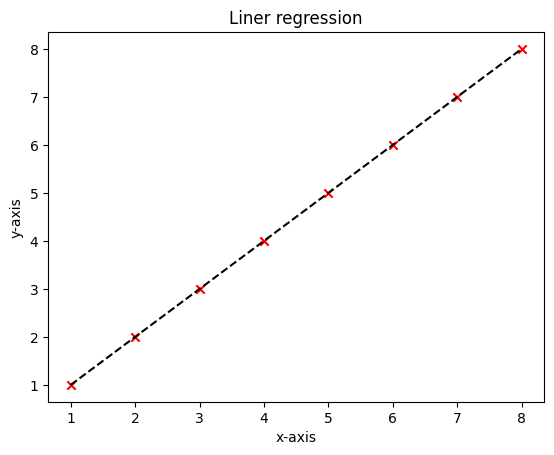

In [25]:
plt.plot(df.x, df.y, linestyle="--", color="black")
plt.scatter(df.x, df.y,  marker="x", color="red")
plt.title("Liner regression")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()